In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import spatial_efd
import math 
import signac
import numpy as np
import os.path
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [2]:
# Defining number of input parameters and number of outputs in the feature 
num_samples = 150
num_harmonics = 20
num_input_parameter = 35

#### Loading screening data data

In [3]:
""" This section of the code does the following tasks
1. Creating input and output training data for building surrogate models
2. The input data is stored in master_parameter_input array with shape [num_samples,num_parameters]
3. The output data is stored in master_parameter_output array with shape [num samples, 4 x num_harmonics]
"""
# Fetching project from signac workspace

# Checking if data exists
doesDataFileExist = os.path.isfile("master_feature_output.npy")

# Loading datafiles if they exist
# Else fetching and preparing data from signac workspace
if doesDataFileExist == True:
    # Loading input parameters
    master_parameter_input_n = np.load('master_parameter_input_n.npy', )
    # Loading output EFD coefficients
    master_feature_output = np.load('master_feature_output.npy', )
else:
    print("No data file exists!")


print(np.shape(master_parameter_input_n))
print(np.shape(master_feature_output))


(150, 35)
(150, 80)


##### Output data preprocessing - Feature reduction using PCA

In [4]:
""" A) his section of code proejects the feature space into lower dimensions using PCA
b) Scikit learn was first used to normalize the data and then take principal components
c) Varaince captured in the principal components is also estimated
d) Further the section plots the correlations between KECM and different principal components
"""
# Importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Storing the feature output data in x (Not save as x as x is for inputs)
x = master_feature_output
# Normalizing the data
x = StandardScaler().fit_transform(x)
# Defining number of components in PCA
pca = PCA(n_components=8)
# Using scikit learn to calculate PCs
principalComponents = pca.fit_transform(x)
# Calculating weights
weights = pca.components_
# Variance explained in the principal components
print(pca.explained_variance_ratio_)


[0.21895301 0.17323367 0.11290526 0.09812456 0.08294328 0.05576723
 0.04099771 0.03003538]


#### Input data preprocesseing : Parameter selection and data normaization

In [5]:
""" TRSAINING AND TESTING DATA FOR GPR MODEL
    a) This section of the code prepares the training data for the GPR model.
    b) Parameter that were varied during the LHS rae chosen as the input variables to the model.
    c) Output training data are the PCs of the PCs of the EFD features
    d) A split is carried out in the inut and output data to create a training and testing dataset for model
    e) Definition of parameters varied in LHS
       i) param_2 - T_squamous_basal 
       ii) param_5 - T_cuboidal_basal
       iii) param_8 - T_columnar_basal
       iv) param_18 - k_columnar_basal
       v) param_19 - k_columnar_apical
       vi) param_20 - k_columnar_lateral
       vii) param_34 - k_ecm
"""

# Transforming input parameter data to log scale
master_parameter_input = np.log(master_parameter_input_n)
# Number of parameters in the Latin Hypercube sampling
num_parameters_LHS = 7
param_index = [1, 4, 7, 17, 18, 19, 33]
split_size = 110
# Initializing the training data
train_x_numpy = np.zeros((num_samples, num_parameters_LHS))
# Getting the parameter values from master_parameter_input
for i in range(num_parameters_LHS):
    train_x_numpy[:,i] = master_parameter_input[:,param_index[i]]

# Normalizing the data around mean
train_x_numpy = StandardScaler().fit_transform(train_x_numpy)

C:\Users\Nilay\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


#### GP modeling

Using Adam Optimizer
Iter 1/1000 - Loss: 6.364
Iter 2/1000 - Loss: 6.034
Iter 3/1000 - Loss: 5.739
Iter 4/1000 - Loss: 5.474
Iter 5/1000 - Loss: 5.236
Iter 6/1000 - Loss: 5.022
Iter 7/1000 - Loss: 4.831
Iter 8/1000 - Loss: 4.660
Iter 9/1000 - Loss: 4.507
Iter 10/1000 - Loss: 4.369
Iter 11/1000 - Loss: 4.246
Iter 12/1000 - Loss: 4.135
Iter 13/1000 - Loss: 4.035
Iter 14/1000 - Loss: 3.946
Iter 15/1000 - Loss: 3.866
Iter 16/1000 - Loss: 3.793
Iter 17/1000 - Loss: 3.727
Iter 18/1000 - Loss: 3.668
Iter 19/1000 - Loss: 3.614
Iter 20/1000 - Loss: 3.565
Iter 21/1000 - Loss: 3.520
Iter 22/1000 - Loss: 3.480
Iter 23/1000 - Loss: 3.443
Iter 24/1000 - Loss: 3.409
Iter 25/1000 - Loss: 3.377
Iter 26/1000 - Loss: 3.349
Iter 27/1000 - Loss: 3.322
Iter 28/1000 - Loss: 3.298
Iter 29/1000 - Loss: 3.275
Iter 30/1000 - Loss: 3.254
Iter 31/1000 - Loss: 3.235
Iter 32/1000 - Loss: 3.217
Iter 33/1000 - Loss: 3.200
Iter 34/1000 - Loss: 3.185
Iter 35/1000 - Loss: 3.170
Iter 36/1000 - Loss: 3.156
Iter 37/1000 - L

Iter 296/1000 - Loss: 2.775
Iter 297/1000 - Loss: 2.775
Iter 298/1000 - Loss: 2.775
Iter 299/1000 - Loss: 2.775
Iter 300/1000 - Loss: 2.775
Iter 301/1000 - Loss: 2.774
Iter 302/1000 - Loss: 2.774
Iter 303/1000 - Loss: 2.774
Iter 304/1000 - Loss: 2.774
Iter 305/1000 - Loss: 2.774
Iter 306/1000 - Loss: 2.774
Iter 307/1000 - Loss: 2.774
Iter 308/1000 - Loss: 2.774
Iter 309/1000 - Loss: 2.773
Iter 310/1000 - Loss: 2.773
Iter 311/1000 - Loss: 2.773
Iter 312/1000 - Loss: 2.773
Iter 313/1000 - Loss: 2.773
Iter 314/1000 - Loss: 2.773
Iter 315/1000 - Loss: 2.773
Iter 316/1000 - Loss: 2.773
Iter 317/1000 - Loss: 2.772
Iter 318/1000 - Loss: 2.772
Iter 319/1000 - Loss: 2.772
Iter 320/1000 - Loss: 2.772
Iter 321/1000 - Loss: 2.772
Iter 322/1000 - Loss: 2.772
Iter 323/1000 - Loss: 2.772
Iter 324/1000 - Loss: 2.772
Iter 325/1000 - Loss: 2.771
Iter 326/1000 - Loss: 2.771
Iter 327/1000 - Loss: 2.771
Iter 328/1000 - Loss: 2.771
Iter 329/1000 - Loss: 2.771
Iter 330/1000 - Loss: 2.771
Iter 331/1000 - Loss

Iter 588/1000 - Loss: 2.759
Iter 589/1000 - Loss: 2.759
Iter 590/1000 - Loss: 2.759
Iter 591/1000 - Loss: 2.759
Iter 592/1000 - Loss: 2.759
Iter 593/1000 - Loss: 2.759
Iter 594/1000 - Loss: 2.759
Iter 595/1000 - Loss: 2.759
Iter 596/1000 - Loss: 2.759
Iter 597/1000 - Loss: 2.759
Iter 598/1000 - Loss: 2.759
Iter 599/1000 - Loss: 2.759
Iter 600/1000 - Loss: 2.759
Iter 601/1000 - Loss: 2.759
Iter 602/1000 - Loss: 2.759
Iter 603/1000 - Loss: 2.759
Iter 604/1000 - Loss: 2.759
Iter 605/1000 - Loss: 2.759
Iter 606/1000 - Loss: 2.759
Iter 607/1000 - Loss: 2.759
Iter 608/1000 - Loss: 2.759
Iter 609/1000 - Loss: 2.759
Iter 610/1000 - Loss: 2.759
Iter 611/1000 - Loss: 2.759
Iter 612/1000 - Loss: 2.759
Iter 613/1000 - Loss: 2.759
Iter 614/1000 - Loss: 2.759
Iter 615/1000 - Loss: 2.759
Iter 616/1000 - Loss: 2.759
Iter 617/1000 - Loss: 2.759
Iter 618/1000 - Loss: 2.759
Iter 619/1000 - Loss: 2.759
Iter 620/1000 - Loss: 2.759
Iter 621/1000 - Loss: 2.759
Iter 622/1000 - Loss: 2.759
Iter 623/1000 - Loss

Iter 880/1000 - Loss: 2.757
Iter 881/1000 - Loss: 2.757
Iter 882/1000 - Loss: 2.757
Iter 883/1000 - Loss: 2.757
Iter 884/1000 - Loss: 2.757
Iter 885/1000 - Loss: 2.757
Iter 886/1000 - Loss: 2.757
Iter 887/1000 - Loss: 2.757
Iter 888/1000 - Loss: 2.757
Iter 889/1000 - Loss: 2.757
Iter 890/1000 - Loss: 2.757
Iter 891/1000 - Loss: 2.757
Iter 892/1000 - Loss: 2.757
Iter 893/1000 - Loss: 2.757
Iter 894/1000 - Loss: 2.757
Iter 895/1000 - Loss: 2.757
Iter 896/1000 - Loss: 2.757
Iter 897/1000 - Loss: 2.757
Iter 898/1000 - Loss: 2.757
Iter 899/1000 - Loss: 2.757
Iter 900/1000 - Loss: 2.757
Iter 901/1000 - Loss: 2.757
Iter 902/1000 - Loss: 2.757
Iter 903/1000 - Loss: 2.757
Iter 904/1000 - Loss: 2.757
Iter 905/1000 - Loss: 2.757
Iter 906/1000 - Loss: 2.757
Iter 907/1000 - Loss: 2.757
Iter 908/1000 - Loss: 2.757
Iter 909/1000 - Loss: 2.757
Iter 910/1000 - Loss: 2.757
Iter 911/1000 - Loss: 2.757
Iter 912/1000 - Loss: 2.757
Iter 913/1000 - Loss: 2.757
Iter 914/1000 - Loss: 2.757
Iter 915/1000 - Loss

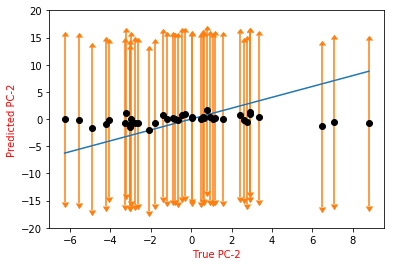

In [7]:
from gaussian_process_regression_class import gaussianProcessRegression
import math
import torch
import gpytorch
from matplotlib import pyplot as plt

# We will use the simplest form of GP model, exact inference
class ExactGPModel(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
        self.mean_module = gpytorch.means.ConstantMean()
        """ Defining a RBF kernel """
        #self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel(ard_num_dims=7))
        self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
        """ Defining a Matern kernel """
        # mu is the smoothness parameter
        #self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.MaternKernel(nu=0.5))
        """ Defining a cosine Kernel """
        #self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.CosineKernel())
        """ Defining a linear kernel """
        #self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.LinearKernel())
        """ Defining a periodic Kernel """
        #self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.PeriodicKernel())
        """ Defining piecewise polunomial Kernel"""
        #self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.PiecewisePolynomialKernel())
        """ Defining a RQ Kernel """
        #self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RQKernel())
        

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

split_size = 110
""" Training data """
train_x = (train_x_numpy[:split_size,:])
train_y_all_pc = (principalComponents[:split_size,:])
""" Testing data """
test_x = (train_x_numpy[split_size:num_samples,:])
test_y_all_pc = principalComponents[split_size:num_samples,:]

pc_index = 1
mod_hyp_init = 0
opt_sel = 1

gpr  = gaussianProcessRegression(train_x, train_y_all_pc, test_x, test_y_all_pc)
# GP_model_definition(self, ExactGPModel, pc_index, model_initialize_check):
model, likelihood, train_x_t, train_y_t, test_x_t, test_y = gpr.GP_model_definition(ExactGPModel, pc_index, mod_hyp_init)
# GP_training(self, train_x_t, train_y_t, model, likelihood, optimizer_select, training_iter):
model, likelihood, lengthscale_hyperparameters = gpr.GP_training(train_x_t, train_y_t, model, likelihood, opt_sel, 1000)
# GP_plotting(self, test_x_t, test_y, model, likelihood, fileNameID, pc_index):
gpr.GP_plotting(test_x_t, test_y, model, likelihood, 1, pc_index)